# IMPORT LIBRAIRES

In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import warnings

warnings.filterwarnings('ignore')

# LOAD AND EXPLORE DATA

In [2]:
# 2. Load the dataset
df = pd.read_csv(r'C:\Users\Sanyam\Desktop\Sanyam\VS_CODE\churn app\data\Telco-Customer-Churn.csv')
 
 # Explore the dataset
df.info()
df.describe()
df['Churn'].value_counts()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# CLEAN AND PREPROCESS DATA

In [3]:
# 3. Clean Data
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Drop unnecessary column
df.drop('customerID', axis=1, inplace=True)

# Encode target variable
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])  # Yes = 1, No = 0
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


# EDA & VISUALISE

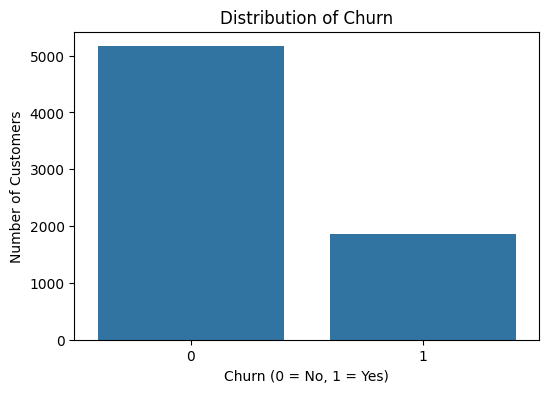

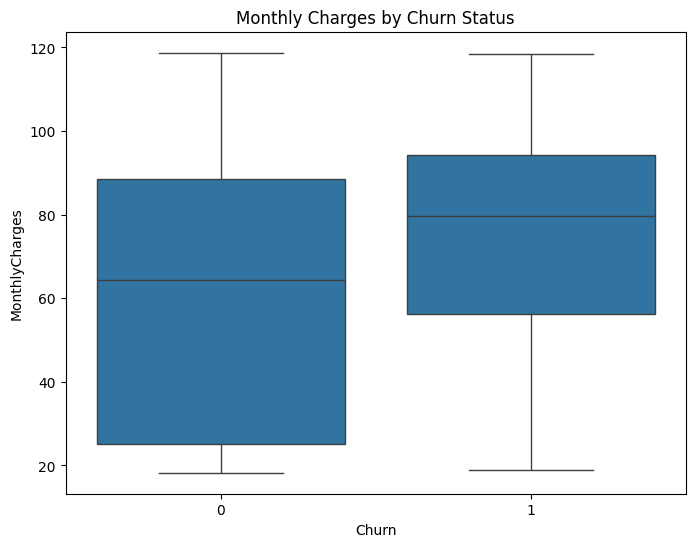

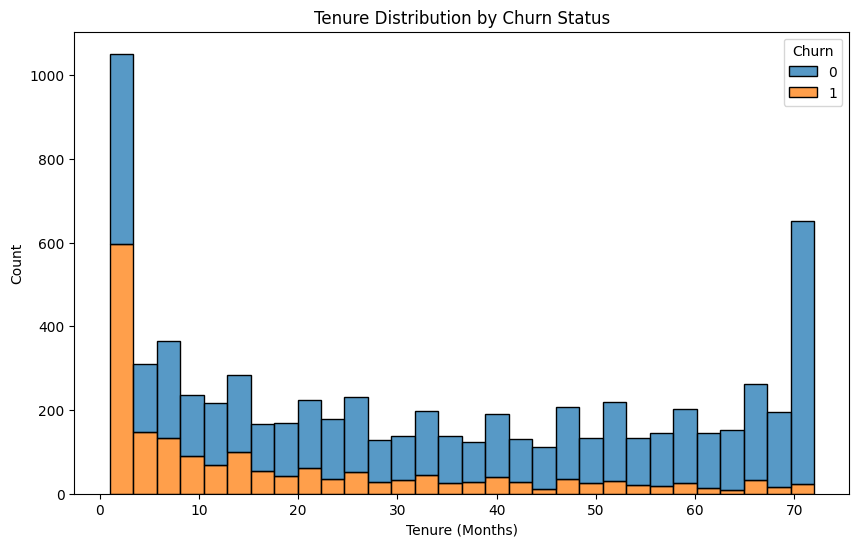

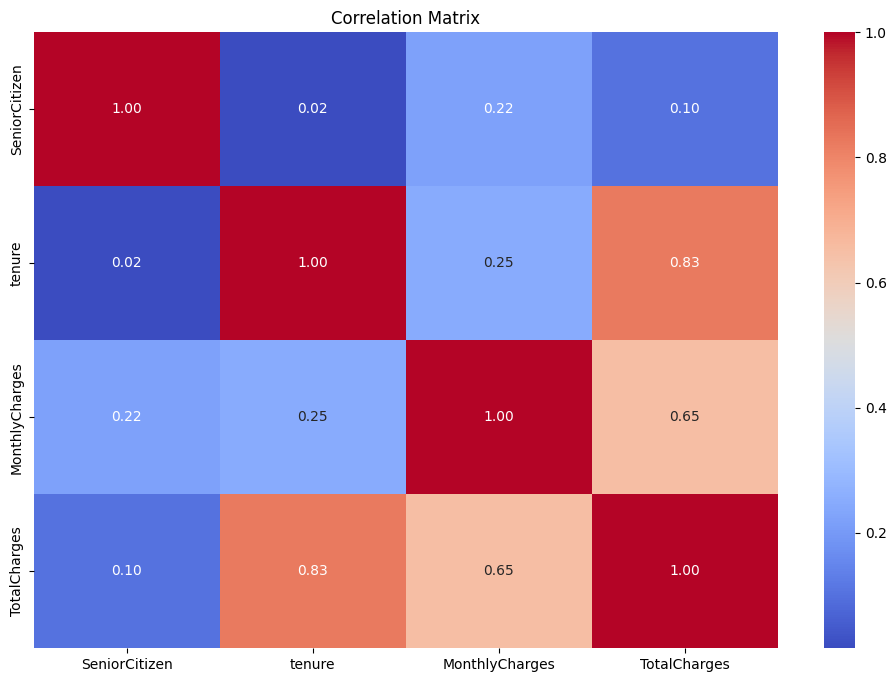

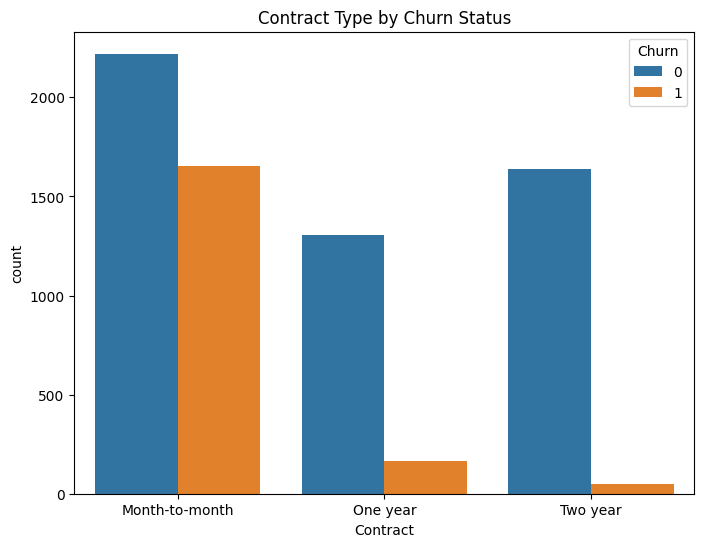

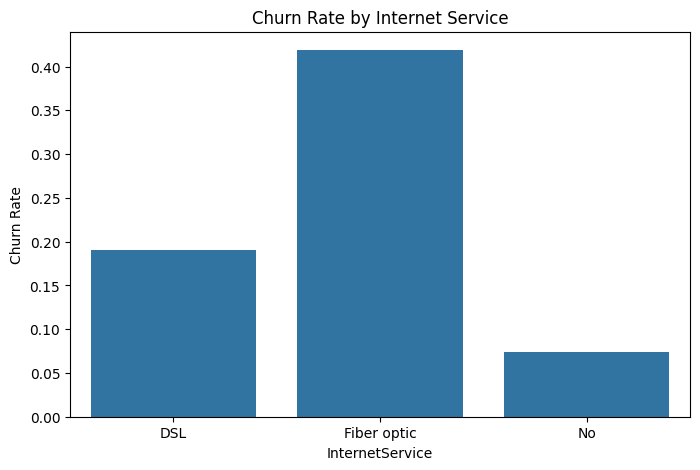

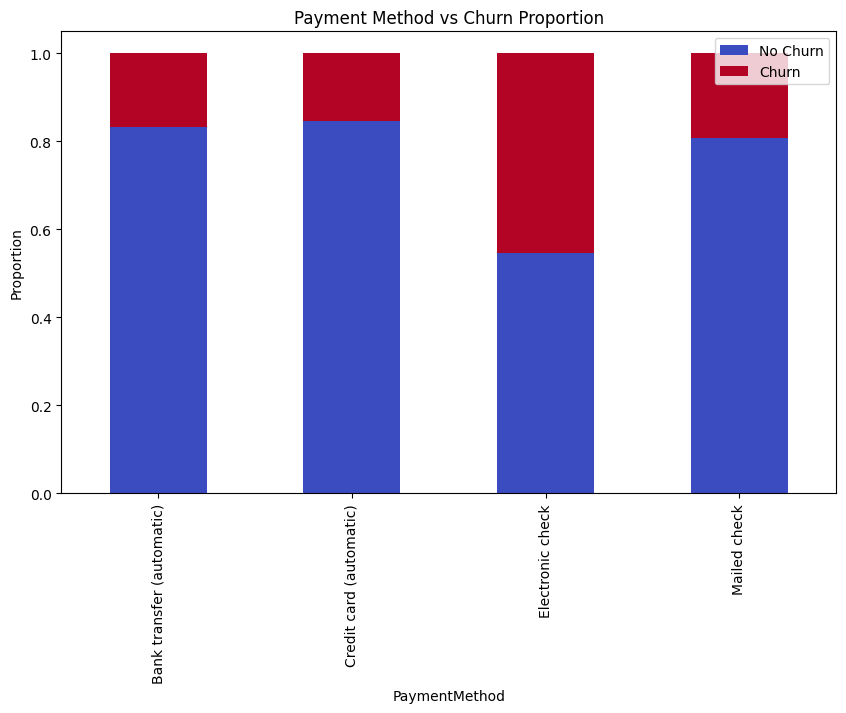

In [20]:
# Visualise
# Distribution of Churn 
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.show()


# Box Plot
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn Status')
plt.show()


# Tenure Distribution by Month
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()


#Correlation Map
plt.figure(figsize=(12,8))
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Count plot of Contract types by churn
plt.figure(figsize=(8,6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Contract Type by Churn Status')
plt.show()


# Churn Rate by Internet Service Type
churn_rate_internet = df.groupby('InternetService')['Churn'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='InternetService', y='Churn', data=churn_rate_internet)
plt.title('Churn Rate by Internet Service')
plt.ylabel('Churn Rate')
plt.show()


# Stock Bar Chart for Payment Method vs Churn Proportion
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index')

payment_churn.plot(kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm')
plt.title('Payment Method vs Churn Proportion')
plt.ylabel('Proportion')
plt.legend(['No Churn', 'Churn'])
plt.show()




# FEATURE ENGINEERING

In [5]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Features and target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']


# Cross-Validation & GridSearchCV for Hyperparameter Tuning

In [6]:
# Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X, y)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, None], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

# EVALUATE THE BEST MODEL WITH BEST PARAMETER

In [7]:
# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


# Train the model with the best parameters
best_model = grid_search.best_estimator_

# Cross-validated accuracy
cv_scores = cross_val_score(best_model, X, y, cv=cv, scoring='accuracy')
print(f"Cross-Validated Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 0.8063141920958105
Cross-Validated Accuracy: 0.8063 ± 0.0071


# FINAL EVALUATION WITH TEST SPILT

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
[[922 111]
 [186 188]]


# SAVE THE TUNED MODEL FOR FUTURE USE

In [9]:
joblib.dump(best_model, 'churn_model.pkl')
print("✅ Best model saved as churn_model.pkl")


✅ Best model saved as churn_model.pkl


In [10]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
